In [0]:
# Import the file from local machine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
# Get and clean data
df = pd.read_csv('Destiny2.csv')
df = df.drop('Unnamed: 0', axis=1)

# Graph 1: Usage per weapon type
tempdf = df[['Name','Rarity','Weapon Type','Usage']].sort_values(by='Usage', ascending=False).copy()
tempdf.columns = ['Name', 'Rarity', 'Weapon Type', 'Usage (%)']
tempdf = tempdf[tempdf['Usage (%)'].notna()]

sums = {}
for wt in tempdf['Weapon Type'].value_counts().index:
  sums[wt] = tempdf[tempdf['Weapon Type']==wt]['Usage (%)'].sum()

sums = pd.DataFrame(sums, index=['Usage (%)']).T.sort_values(by='Usage (%)', ascending=False).reset_index()
sums.columns = ['Type','Usage (%)']

sums

,Type,Usage (%)
0,Hand Cannon,27.299
1,Sniper Rifle,13.313
2,Shotgun,13.034
3,Pulse Rifle,7.158
4,Fusion Rifle,4.337
5,Rocket Launcher,4.106
6,Scout Rifle,4.086
7,Sidearm,3.372
8,Grenade Launcher,2.330
9,Machine Gun,2.200


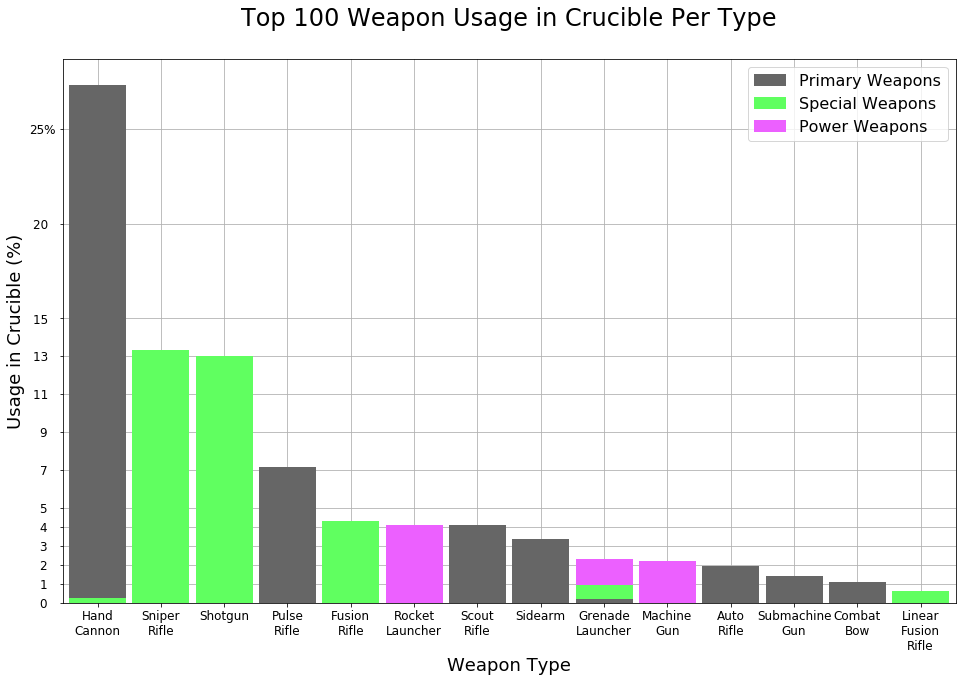

In [142]:
# Set up graph
fig = plt.figure(figsize=(16,10), facecolor='w')
ax = plt.subplot(111, facecolor='w')

# Plot, seperating bars by the ammo they use
for i, wep in enumerate(sums['Usage (%)']):
  if any(x in sums['Type'][i] for x in ['Sniper Rifle','Shotgun','Fusion Rifle']):
    ax.bar(i, wep, width=0.9, color='#60FF60')
  elif any(x in sums['Type'][i] for x in ['Rocket Launcher','Grenade Launcher','Machine Gun','Linear Fusion Rifle']):
    ax.bar(i, wep, width=0.9, color='#EC60FF')
  else:
    ax.bar(i, wep, width=0.9, color='#666666')

# Draw bars off plot to set up legend
ax.bar(-999,0,color='#666666',label='Primary Weapons')
ax.bar(-999,0,color='#60FF60',label='Special Weapons')
ax.bar(-999,0,color='#EC60FF',label='Power Weapons')

# Draw bars over current ones for weapons that fall outside of normal ammo catagories
ax.bar(8, .962, color='#60FF60', width=.9)  # Mountaintop
ax.bar(8, .195, color='#666666', width=.9)  # Fighting Lion
ax.bar(0, .258, color='#60FF60', width=.9)  # Eriana's Vow

# Set up axes ticks and labels
ax.set_xticks(range(sums.shape[0]))
ax.set_xlim([-.55,13.55])
ax.set_xticklabels([x.replace(' ','\n') for x in sums['Type']], fontsize=12)
ax.set_yticks([0,1,2,3,4,5,7,9,11,13,15,20,25])
ax.set_yticklabels(['0  ','1  ','2  ','3  ','4  ','5  ','7  ','9  ','11  ','13  ','15  ','20  ','25%'], fontsize=12)
ax.set_xlabel("Weapon Type", fontsize=18)
ax.set_ylabel("Usage in Crucible (%)", fontsize=18)

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.legend(loc='upper right', fontsize=16)
ax.set_title('Top 100 Weapon Usage in Crucible Per Type', fontsize=24,x=0.5,y=1.05)

plt.show()

In [143]:
# Graph 2: Handcannon usage per archetype
tempdf = df[df['Weapon Type']=='Hand Cannon']
sums = {}
for wt in tempdf[tempdf['Usage'].notna()]['Archetype'].value_counts().index:
  sums[wt] = tempdf[tempdf['Archetype']==wt]['Usage'].sum()

#print(sums)

x = 0
for wt in ['Banned Weapon','Fan Fire','Mark of the Devourer','Memento Mori','Sunburn','Looks Can Kill','Explosive Shadow']:
  x += sums.pop(wt)
sums['Exotic Weapons'] = x

sums = pd.DataFrame(sums, index=['Usage']).T.sort_values(by='Usage', ascending=False).reset_index()
sums.columns = ['Archetype', 'Usage (%)']

sums

,Archetype,Usage (%)
0,Exotic Weapons,10.102
1,Precision Frame,10.006
2,Lightweight Frame,5.504
3,Adaptive Frame,1.399
4,Aggressive Frame,0.288


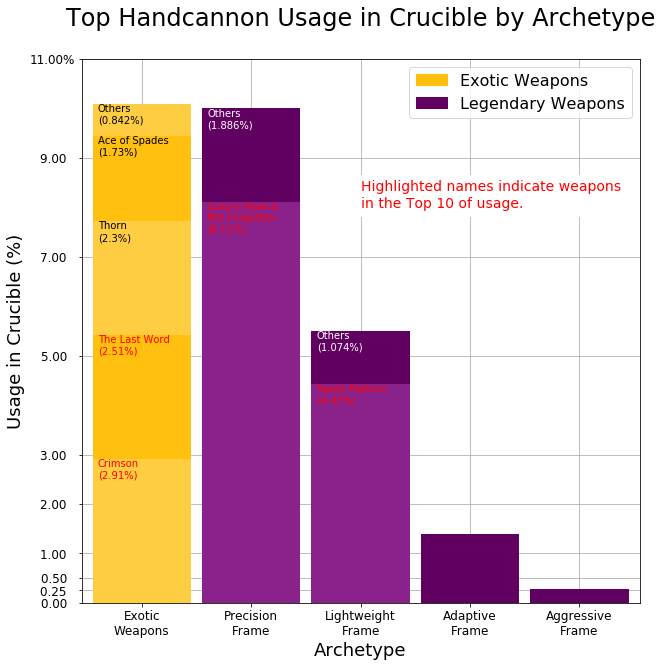

In [144]:
# Set up graph
fig = plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(111)

# Plot bars
for i, wep in enumerate(sums['Usage (%)']):
  #print(sums.iloc[i]['Archetype'])
  if sums.iloc[i]['Archetype'].endswith('Frame'):
    ax.bar(i, wep, width=.9, color='#600060')
  else:
    ax.bar(i, wep, width=.9, color='#FFCD41')

# individual weapon bar overlays
ax.annotate('Others\n(0.842%)',xy=(-.4,10.102),va='top')
# Ace of Spades
ax.bar(0,9.450,width=.9,color='#FFC00F')
ax.annotate('Ace of Spades\n(1.73%)',xy=(-.4,9.45),va='top')
# Thorn
ax.bar(0,7.720,width=.9,color='#FFCD41')
ax.annotate('Thorn\n(2.3%)',xy=(-.4,7.72),va='top')
# The Last Word
ax.bar(0,5.420,width=.9,color='#FFC00F')
ax.annotate('The Last Word\n(2.51%)',xy=(-.4,5.42),va='top', color='r')
# Crimson
ax.bar(0,2.910,width=.9,color='#FFCD41')
ax.annotate('Crimson\n(2.91%)',xy=(-.4,2.91),va='top', color='r')
# Luna's Howl and Not Forgotten
ax.bar(1,8.12,width=.9,color='#8B228B')
ax.annotate('Luna\'s Howl &\nNot Forgotten\n(8.12%)',xy=(.6,8.12),va='top',color='r')
ax.annotate('Others\n(1.886%)',xy=(.6,10.006),va='top',color='w')
# Spare Rations
ax.bar(2,4.43,width=.9,color='#8B228B')
ax.annotate('Spare Rations\n(4.43%)',xy=(1.6,4.43),va='top',color='r')
ax.annotate('Others\n(1.074%)',xy=(1.6,5.504),va='top',color='w')

ax.annotate('Highlighted names indicate weapons\nin the Top 10 of usage.', xy=(2,8),color='r',backgroundcolor='w', fontsize=14)

# label bars
ax.bar(-999,0,label='Exotic Weapons', color='#FFC00F')
ax.bar(-999,0,label='Legendary Weapons', color='#600060')

# Set up axes ticks and labels
ax.set_xticks(range(0,(sums.shape[0])))
ax.set_xlim([-.55,4.55])
ax.set_xticklabels([x.replace(' ','\n') for x in sums['Archetype']], fontsize=12)
ax.set_yticks([0,.25,.5,1,2,3,5,7,9,11])
ax.set_yticklabels(['0.00  ','0.25  ','0.50  ','1.00  ','2.00  ','3.00  ','5.00  ','7.00  ','9.00  ','11.00%'], fontsize=12)
ax.set_xlabel("Archetype", fontsize=18)
ax.set_ylabel("Usage in Crucible (%)", fontsize=18)

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.legend(loc='upper right', fontsize=16)
ax.set_title('Top Handcannon Usage in Crucible by Archetype', fontsize=24,x=0.5,y=1.05)

plt.show()

In [145]:
# Graph 3: Shotgun comparison
tempdf = df[df['Weapon Type']=='Shotgun']
sums = {}
for wt in tempdf[tempdf['Usage'].notna()]['Archetype'].value_counts().index:
  sums[wt] = tempdf[tempdf['Archetype']==wt]['Usage'].sum()

sums['Lord of Wolves'] = sums.pop('Shrapnel Launcher')
sums['Chaperone'] = sums.pop('Precision Slug')

#print(sums)

sums = pd.DataFrame(sums, index=['Usage']).T.sort_values(by='Usage', ascending=False).reset_index()
sums.columns = ['Archetype', 'Usage (%)']

sums

,Archetype,Usage (%)
0,Aggressive Frame,6.462
1,Precision Frame,3.463
2,Lord of Wolves,1.150
3,Rapid-Fire Frame,0.797
4,Chaperone,0.689
5,Lightweight Frame,0.473


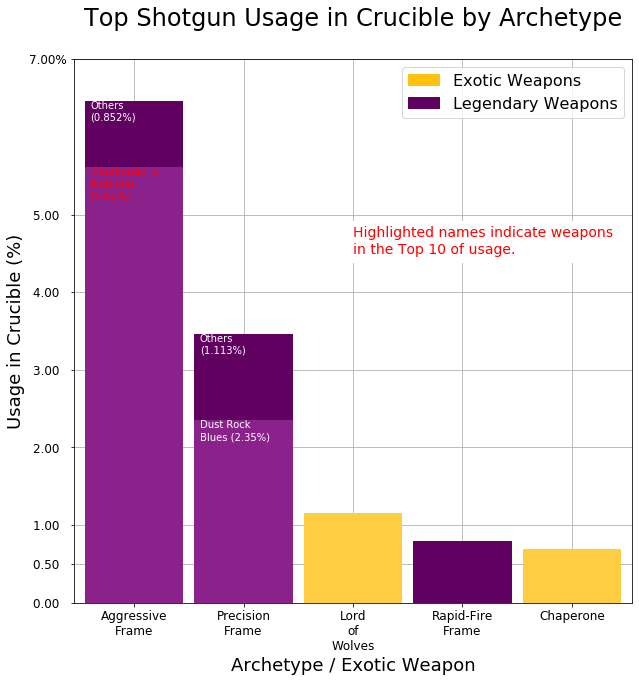

In [146]:
# Set up graph
fig = plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(111)

# Plot bars
for i, wep in enumerate(sums['Usage (%)']):
  #print(sums.iloc[i]['Archetype'])
  if sums.iloc[i]['Archetype'].endswith('Frame'):
    ax.bar(i, wep, width=.9, color='#600060')
  else:
    ax.bar(i, wep, width=.9, color='#FFCD41')

# label bars
ax.bar(-999,0,label='Exotic Weapons', color='#FFC00F')
ax.bar(-999,0,label='Legendary Weapons', color='#600060')

# Extra bars and annotations
# Mindbender's Ambition
ax.bar(0,5.61,width=.9,color='#8B228B')
ax.annotate('MindBender\'s\nAmbition\n(5.61%)',xy=(-.4,5.61),va='top',color='r')
ax.annotate('Others\n(0.852%)',xy=(-.4,6.462),va='top',color='w')
# Dust Rock Blues
ax.bar(1,2.35,width=.9,color='#8B228B')
ax.annotate('Dust Rock\nBlues (2.35%)',xy=(.6,2.35),va='top',color='w')
ax.annotate('Others\n(1.113%)',xy=(.6,3.463),va='top',color='w')

ax.annotate('Highlighted names indicate weapons\nin the Top 10 of usage.', xy=(2,4.5),color='r',backgroundcolor='w', fontsize=14)

ax.set_xticks(range(0,(sums.shape[0])))
ax.set_xlim([-.55,4.55])
ax.set_xticklabels([x.replace(' ','\n') for x in sums['Archetype']], fontsize=12)
ax.set_yticks([0,.5,1,2,3,4,5,7])
ax.set_yticklabels(['0.00  ','0.50  ','1.00  ','2.00  ','3.00  ','4.00  ','5.00  ','7.00%'], fontsize=12)
ax.set_xlabel("Archetype / Exotic Weapon", fontsize=18)
ax.set_ylabel("Usage in Crucible (%)", fontsize=18)

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.legend(loc='upper right', fontsize=16)
ax.set_title('Top Shotgun Usage in Crucible by Archetype', fontsize=24,x=0.5,y=1.05)

plt.show()

In [147]:
# Graph 4: Handcannon Stat Means per Archetype
tempdf = df[df['Weapon Type']=='Hand Cannon']
sums = {}

for wt in tempdf[tempdf['Usage'].notna()]['Archetype'].value_counts().index:
  sums[wt] = []
  sums[wt].append(tempdf[tempdf['Archetype']==wt]['Usage'].sum())
  sums[wt].append(tempdf[tempdf['Archetype']==wt]['Handling'].mean())
  sums[wt].append(tempdf[tempdf['Archetype']==wt]['Aim Assistance'].mean())
  sums[wt].append(tempdf[tempdf['Archetype']==wt]['Reload Speed'].mean())


sums.pop('Memento Mori')
sums.pop('Sunburn')
sums.pop('Looks Can Kill')
sums.pop('Explosive Shadow')
sums['Crimson'] = sums.pop('Banned Weapon')
sums['The Last Word'] = sums.pop('Fan Fire')
sums['Thorn'] = sums.pop('Mark of the Devourer')

sums = pd.DataFrame(sums).T.reset_index()
sums.columns = ['Archetype','Usage (%)','Handling','Aim Assistance','Reload Speed']
sums = sums.sort_values(by='Usage (%)', ascending=False)
sums = sums.reset_index().drop('index',axis=1)
sums

,Archetype,Usage (%),Handling,Aim Assistance,Reload Speed
0,Precision Frame,10.006,40.333333,75.000000,45.555556
1,Lightweight Frame,5.504,68.300000,86.200000,60.300000
2,Crimson,2.910,50.000000,75.000000,64.000000
3,The Last Word,2.510,28.000000,40.000000,82.000000
4,Thorn,2.300,68.000000,85.000000,46.000000
5,Adaptive Frame,1.399,48.357143,71.857143,47.357143
6,Aggressive Frame,0.288,32.181818,61.545455,32.363636


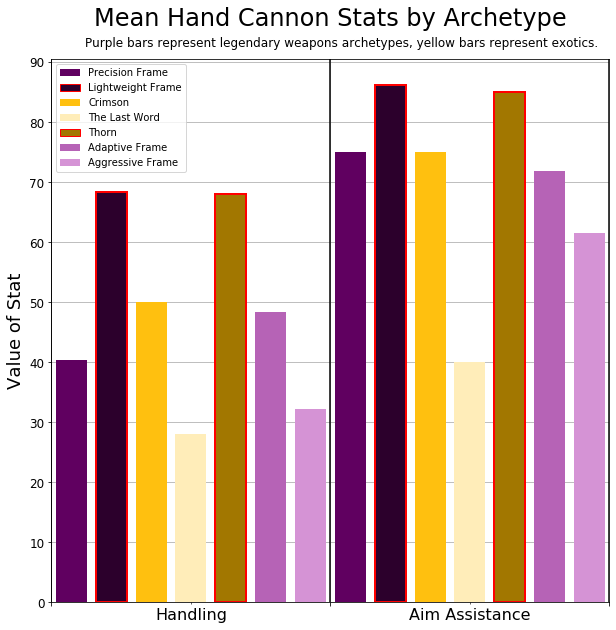

In [148]:
# Set up graph
fig = plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(111)

colors = ['#600060','#2C002C','#FFC00F','#FFEDB9','#A27700','#B663B6','#D593D5']

# Plot bars
for i, wep in enumerate(sums.index):
  #print(sums.iloc[wep])
  for j, stat in enumerate(sums.iloc[wep]):
    #print(stat)
    if j == 0 or j == 1:
      continue
    #print(stat)
    if sums.iloc[i]['Archetype'].startswith('Lightweight') or sums.iloc[i]['Archetype'].startswith('Thorn'):
      ax.bar((j-2)+(i/7), stat, width=(1/9), color=colors[i], edgecolor='r',linewidth=2)
    else:
      ax.bar((j-2)+(i/7), stat, width=(1/9), color=colors[i])

# label bars
for i, x in enumerate(sums['Archetype']):
  if sums.iloc[i]['Archetype'].startswith('Lightweight') or sums.iloc[i]['Archetype'].startswith('Thorn'):
    ax.bar(-999,0,label=x,color=colors[i],edgecolor='r')
  else:
    ax.bar(-999,0,label=x,color=colors[i])

#ax.annotate('Highlighted names indicate weapons\nin the Top 10 of usage.', xy=(2,4.5),color='r',backgroundcolor='w', fontsize=14)

for i in range(3):
  ax.axvline(i-(1/14),color='k')

ax.set_xticks([x - (1/14) for x in range(4)], minor=False)
ax.set_xticks([x + .5 - (1/14) for x in range(4)], minor=True)
ax.set_xlim([-(1/14),2-(1/14)])
ax.set_xticklabels(sums.columns[2:], fontsize=16, minor=True)
ax.set_xticklabels(['','','',''], minor=False)
ax.set_yticks(range(0,100,10))
ax.set_yticklabels([str(x) for x in range(0,100,10)],fontsize=12)
ax.set_ylabel("Value of Stat", fontsize=18)

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Mean Hand Cannon Stats by Archetype', fontsize=24,x=0.5,y=1.05)
ax.text(0.05,92.5,'Purple bars represent legendary weapons archetypes, yellow bars represent exotics.',fontsize=12)

plt.show()

In [149]:
# Graph 5: Shotgun Stats Means per Archetype
tempdf = df[(df['Weapon Type'].str.startswith('Shotgun') & df['Archetype'].str.startswith('Aggressive') & df['Usage'].notna())]
sums = {}

for wt in tempdf[tempdf['Usage'].notna()]['Name'].value_counts().index:
  sums[wt] = []
  sums[wt].append(tempdf[tempdf['Name']==wt]['Usage'].sum())
  sums[wt].append(tempdf[tempdf['Name']==wt]['Range'].sum())
  sums[wt].append(tempdf[tempdf['Name']==wt]['Stability'].sum())
  sums[wt].append(tempdf[tempdf['Name']==wt]['Handling'].sum())
  sums[wt].append(tempdf[tempdf['Name']==wt]['Reload Speed'].sum())
  sums[wt].append(tempdf[tempdf['Name']==wt]['Aim Assistance'].sum())

sums = pd.DataFrame(sums).T.reset_index()
sums.columns = ['Name','Usage (%)','Range','Stability','Handling','Reload Speed','Aim Assistance']
sums = sums.sort_values(by='Usage (%)', ascending=False)
sums = sums.reset_index().drop('index',axis=1)
sums

,Name,Usage (%),Range,Stability,Handling,Reload Speed,Aim Assistance
0,Mindbender's Ambition,5.610,36.0,36.0,38.0,45.0,39.0
1,Last Man Standing,0.355,33.0,27.0,32.0,38.0,26.0
2,Python,0.309,32.0,32.0,34.0,42.0,37.0
3,Imperial Decree,0.188,36.0,36.0,38.0,41.0,35.0


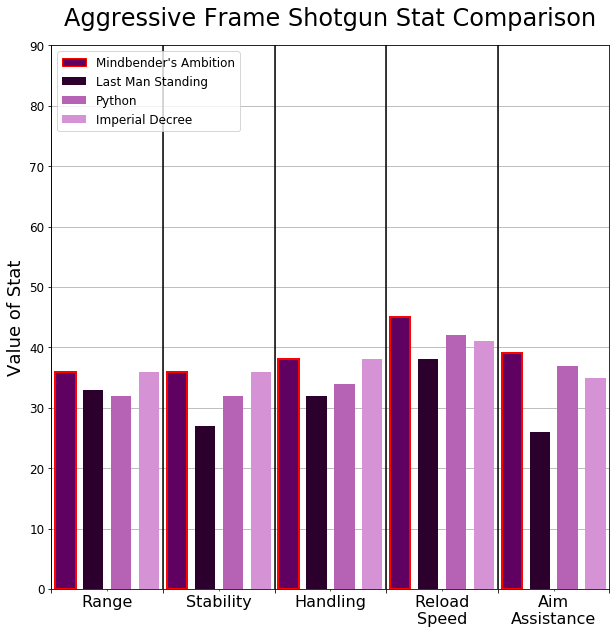

In [150]:
# Set up graph
fig = plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(111)

colors = ['#600060','#2C002C','#B663B6','#D593D5']

# Plot bars
for i, wep in enumerate(sums.index):
  #print(sums.iloc[wep])
  for j, stat in enumerate(sums.iloc[wep]):
    #print(stat)
    # Ignore name and usage
    if j == 0 or j == 1:
      continue
    #print(stat)
    if sums.iloc[i]['Name'].startswith('Mindbender'):
      ax.bar((j-2)+(i/4), stat, width=(1/5.5), color=colors[i], edgecolor='r',linewidth=2)
    else:
      ax.bar((j-2)+(i/4), stat, width=(1/5.5), color=colors[i])

# label bars
for i, x in enumerate(sums['Name']):
  if sums.iloc[i]['Name'].startswith('Mindbender'):
    ax.bar(-999,0,label=x,color=colors[i],edgecolor='r')
  else:
    ax.bar(-999,0,label=x,color=colors[i])

#ax.annotate('Highlighted names indicate weapons\nin the Top 10 of usage.', xy=(2,4.5),color='r',backgroundcolor='w', fontsize=14)

for i in range(5):
  ax.axvline(i-(1/8),color='k')

ax.set_xticks([x - (1/8) for x in range(6)], minor=False)
ax.set_xticks([x + .5 - (1/8) for x in range(6)], minor=True)
ax.set_xlim([-(1/8),5-(1/8)])
ax.set_xticklabels([x.replace(' ','\n') for x in sums.columns[2:]], fontsize=16, minor=True)
ax.set_xticklabels(['','','',''], minor=False)
ax.set_yticks(range(0,100,10))
ax.set_yticklabels([str(x) for x in range(0,100,10)],fontsize=12)
ax.set_ylabel("Value of Stat", fontsize=18)

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.legend(loc='upper left', fontsize=12)
ax.set_title('Aggressive Frame Shotgun Stat Comparison', fontsize=24,x=0.5,y=1.025)

plt.show()

In [151]:
# Graph 6: Sniper Rifle comparison
tempdf = df[df['Weapon Type']=='Sniper Rifle']
sums = {}
for wt in tempdf[tempdf['Usage'].notna()]['Archetype'].value_counts().index:
  sums[wt] = tempdf[tempdf['Archetype']==wt]['Usage'].sum()

#print(sums)

sums = pd.DataFrame(sums, index=['Usage']).T.sort_values(by='Usage', ascending=False).reset_index()
sums.columns = ['Archetype', 'Usage (%)']

sums

,Archetype,Usage (%)
0,Aggressive Frame,7.278
1,Adaptive Frame,5.161
2,Rapid-Fire Frame,0.874


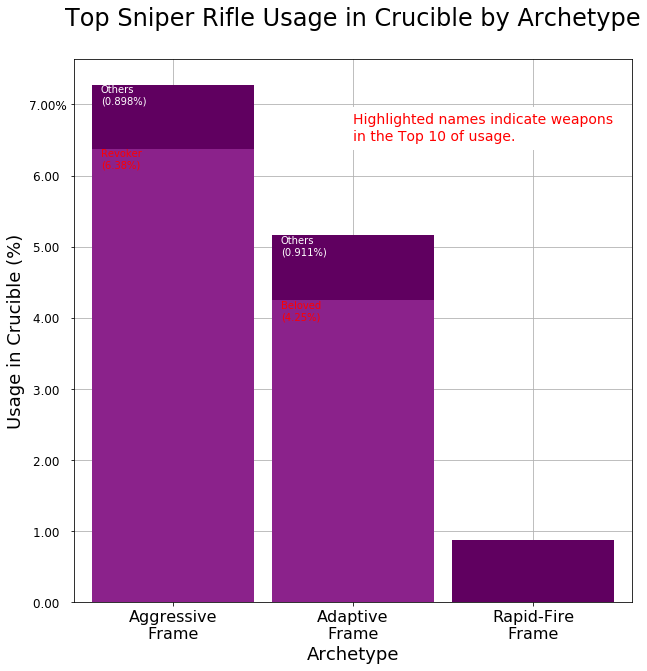

In [152]:
# Set up graph
fig = plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(111)

# Plot bars
for i, wep in enumerate(sums['Usage (%)']):
  #print(sums.iloc[i]['Archetype'])
  if sums.iloc[i]['Archetype'].endswith('Frame'):
    ax.bar(i, wep, width=.9, color='#600060')
  else:
    ax.bar(i, wep, width=.9, color='#FFCD41')

# Extra bars and annotations
# Mindbender's Ambition
ax.bar(0,6.38,width=.9,color='#8B228B')
ax.annotate('Revoker\n(6.38%)',xy=(-.4,6.38),va='top',color='r')
ax.annotate('Others\n(0.898%)',xy=(-.4,7.278),va='top',color='w')
# Dust Rock Blues
ax.bar(1,4.25,width=.9,color='#8B228B')
ax.annotate('Beloved\n(4.25%)',xy=(.6,4.25),va='top',color='r')
ax.annotate('Others\n(0.911%)',xy=(.6,5.161),va='top',color='w')

ax.annotate('Highlighted names indicate weapons\nin the Top 10 of usage.', xy=(1,6.5),color='r',backgroundcolor='w', fontsize=14)

ax.set_xticks(range(0,(sums.shape[0])))
ax.set_xlim([-.55,2.55])
ax.set_xticklabels([x.replace(' ','\n') for x in sums['Archetype']], fontsize=16)
ax.set_yticks([0,1,2,3,4,5,6,7])
ax.set_yticklabels(['0.00  ','1.00  ','2.00  ','3.00  ','4.00  ','5.00  ','6.00  ','7.00%'], fontsize=12)
ax.set_xlabel("Archetype", fontsize=18)
ax.set_ylabel("Usage in Crucible (%)", fontsize=18)

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.set_title('Top Sniper Rifle Usage in Crucible by Archetype', fontsize=24,x=0.5,y=1.05)

plt.show()

In [153]:
# Graph 7: Popularity of Perks
tempdf = df[(df['Usage'].notna() & df['Rarity'].str.startswith('Legendary'))].sort_values(by='Usage',ascending=False)
tempdf = tempdf[['Name','Weapon Type','Archetype','Usage','Perk 3 Init','Perk 3 Rolls','Perk 4 Init','Perk 4 Rolls']].reset_index().drop('index',axis=1)

tempdf = tempdf.fillna('np.nan')

perksdf = {}
for i, wep in enumerate(tempdf[['Perk 3 Init','Perk 3 Rolls','Perk 4 Init','Perk 4 Rolls']].values):
  temp1 = []
  temp2 = []
  # Check if roll lists can be grabbed
  if 'np.nan' not in wep[1]:
    temp1 = wep[1].replace('[','').replace('"',"'").replace(']','').replace(',','').replace("' '","','").split(',')
  if 'np.nan' not in wep[3]:
    temp2 = wep[3].replace('[','').replace('"',"'").replace(']','').replace(',','').replace("' '","','").split(',')
  # I can concatinate these without worrying about duplicates because no perk is on a weapon twice
  # Now add implicit perks to their respective lists
  if 'np.nan' not in wep[0]:
    temp1.append(wep[0])
  if 'np.nan' not in wep[2]:
    temp2.append(wep[2])
  for perk in temp1:
    #print(perk)
    if perk.strip("'") in perksdf:
      perksdf[perk.strip("'")] = perksdf[perk.strip("'")] + (tempdf.iloc[i,3] / len(temp1))
    else:
        perksdf[perk.strip("'")] = tempdf.iloc[i,3]
  for perk in temp2:
    #print(perk)
    if perk.strip("'") in perksdf:
      perksdf[perk.strip("'")] = perksdf[perk.strip("'")] + (tempdf.iloc[i,3] / len(temp2))
    else:
      perksdf[perk.strip("'")] = tempdf.iloc[i,3]

perksdf = pd.DataFrame(perksdf, index=[0]).T.reset_index()
perksdf.columns = ['Name','Usage']
perksdf = perksdf.sort_values(by='Usage',ascending=False).reset_index().drop('index',axis=1)
perksdf.head(20)

,Name,Usage
0,Rampage,12.084770
1,Snapshot Sights,11.949363
2,Zen Moment,11.006292
3,Moving Target,9.195477
4,Threat Detector,8.556154
5,Quickdraw,8.250936
6,Auto-Loading Holster,8.201563
7,Magnificent Howl,8.120000
8,Slideshot,7.743989
9,Opening Shot,7.578119


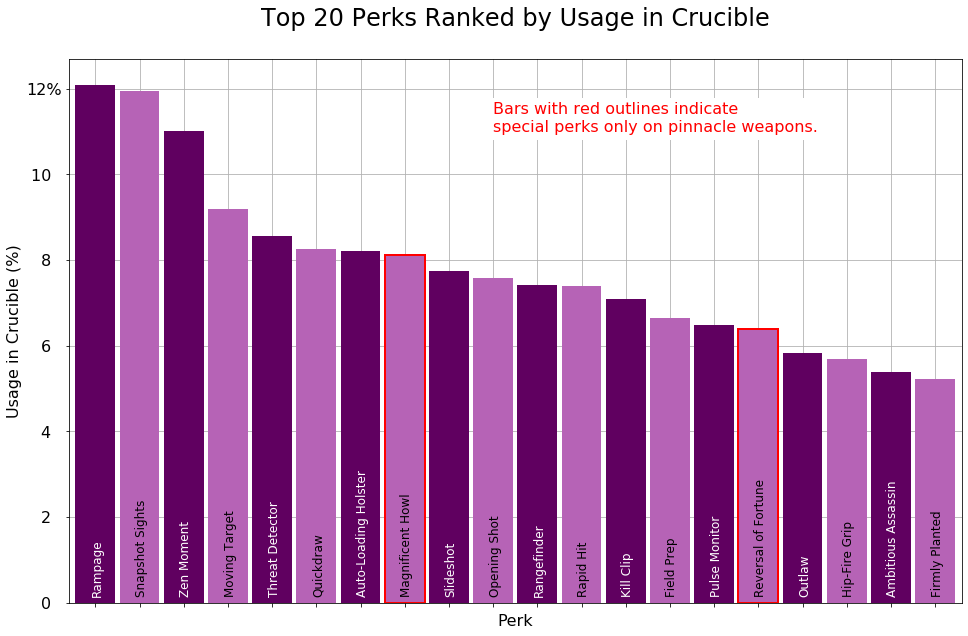

In [154]:
# Set up graph
fig = plt.figure(figsize=(16,10),facecolor='w')
ax = plt.subplot(111)

colors = ['#600060', '#B663B6']
textcolors = ['#FFFFFF','#000000']

for i, wep in enumerate(perksdf['Usage'].head(20)):
  if perksdf['Name'][i].startswith('Magnificent') or perksdf['Name'][i].startswith('Reversal'):
    ax.bar(i, wep, width=.9, color=colors[i%2], edgecolor='r', linewidth=2)
  else:
    ax.bar(i, wep, width=.9, color=colors[i%2])
  ax.annotate(perksdf['Name'][i], xy=(i-.1,0.2), rotation=90, fontsize=12, color=textcolors[i%2])

ax.set_yticks(range(0,13,2))
ax.set_xticks(range(20))
ax.set_xticklabels(['' for x in range(20)])
ax.set_yticklabels(['0  ','2  ','4  ','6  ','8  ','10  ','12%'], fontsize=16)
ax.set_xlim([-.6,19.6])
ax.set_xlabel('Perk', fontsize=16)
ax.set_ylabel('Usage in Crucible (%)', fontsize=16)

ax.annotate('Bars with red outlines indicate\nspecial perks only on pinnacle weapons.',xy=(9,11), color='r',fontsize=16,backgroundcolor='w')

# Set up grid, legend, title
ax.grid(b=True)
ax.set_axisbelow(True)
ax.set_title('Top 20 Perks Ranked by Usage in Crucible', fontsize=24,x=0.5,y=1.05)

plt.show()